In [1]:
using Pkg; Pkg.activate(".")
using PyPlot
using MUST
using DelimitedFiles

MUST.@import_dispatch "/shared-storage/eitner/model_grid/dispatch2";

  Activating environment at `/usr/local/autofs.shared/shared-storage/eitner/model_grid/MUST.jl/examples/initial_conditions/Project.toml`
┌ Info: Precompiling MUST [78ff202f-d08f-4a78-aa4d-c8e96fa3dcb9]
└ @ Base loading.jl:1342


# Target properties of the model

In [2]:
Teff = 5777.0
logg = log(2.75e4);

The corresponding model we want to compare it to

In [3]:
model = readdlm("staggertest.dat", skipstart=2)
z_goal, T_goal, d_goal = -model[:, 1], model[:, 2], model[:, 3];

The corresponding box dimensions based on the scale height

In [18]:
MUST.box_dimensions(Teff, exp(logg))

Dict{Symbol, Float64} with 2 entries:
  :z => 4.0299
  :x => 1.49682

EoS + Opacities

In [4]:
eos_path = "input_data/TSO_sun_Magg_v1.1"
eos      = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

# 1. Investigate the Adiabat

In [12]:
## Initial point of the simulation
T_ini = 10000.0
ρ_ini = 3.5e-7
z0    = -0.1;

In [19]:
z,d,ee,t,p = MUST.initial_adiabat(eos, T_ini, ρ_ini, exp(logg), ee_min=3.5, nz=400, i0=150, z0_position=z0);

z[i0] = -0.1
d[i0] = 3.5
ee[i0] = 4.5091400146484375
t[i0] = 9999.964859353464
MUST.lookup(eos, :T, d[i0] * scaling.d, ee[i0] * scaling.ee) = 9999.964859353464


Temperature density diagram

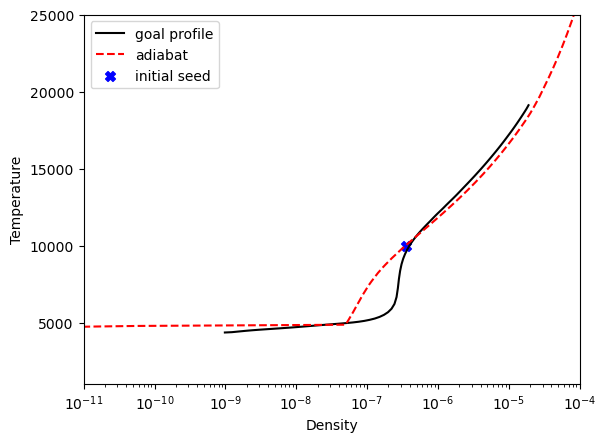

In [20]:
## Plotting
#close()

# Curves
plt.plot(d_goal, T_goal, color="k",          label="goal profile")
plt.plot(d,      t,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([ρ_ini], [T_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(1e-11, 1e-4)
plt.ylim(1000, 25000)

## labels
plt.xlabel("Density")
plt.ylabel("Temperature")
plt.xscale("log")
plt.legend();

#gcf()

Profiles against geometrical depth

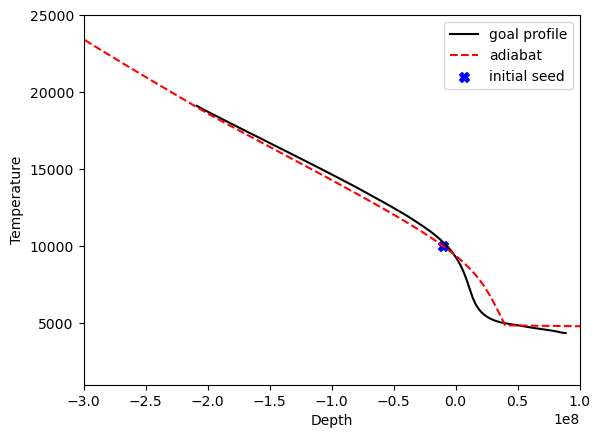

In [21]:
## Plotting
#close()

# Curves
plt.plot(z_goal, T_goal, color="k",          label="goal profile")
plt.plot(z*1e8,      t,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([z0*1e8], [T_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(-3e8, 1e8)
plt.ylim(1000, 25000)

## labels
plt.xlabel("Depth")
plt.ylabel("Temperature")
plt.legend();

#gcf()

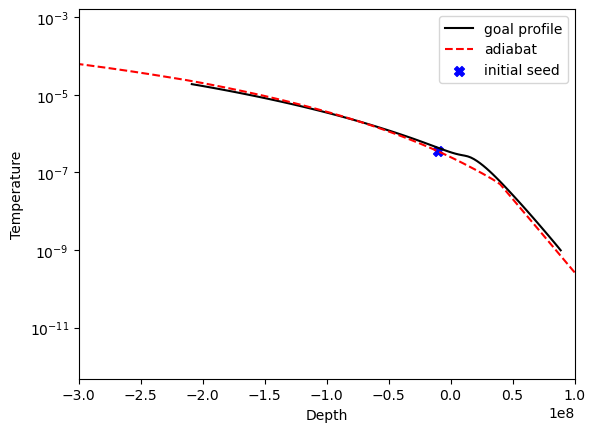

In [22]:
## Plotting
#close()

# Curves
plt.plot(z_goal, d_goal, color="k",          label="goal profile")
plt.plot(z*1e8,      d,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([z0*1e8], [ρ_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(-3e8, 1e8)
#plt.ylim(1000, 25000)

## labels
plt.xlabel("Depth")
plt.ylabel("Temperature")
plt.yscale("log")
plt.legend();

#gcf()